<a href="https://colab.research.google.com/github/ShahidHasib586/ML-lab-Baroudi-MIR/blob/main/Machine_Learning_Lab3_Shahid_Ahamed_Hasib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, we’re going to create a K-Nearest Neighbour (KNN) classifier. This lab is optional, and will not be marked.

Download the Data
In creating the KNN, we’ll use another toy dataset, the wine quality dataset https://archive.ics.uci.edu/dataset/186/wine+quality. Specifically, the red wine.

To get access to the dataset, click on the download button. Inside the now downloaded folder, there will be two CSV files, one for red wine, and another for white wine. For this lab, we’ll be using the red wine dataset.

Lets check the current python version

In [1]:
!python --version

Python 3.11.11



## Question 2

Download the Iris dataset from https://archive.ics.uci.edu/dataset/53/iris. The dataset can be downloaded from iris.data. Load the data into a pandas dataframe.

For this lab, we’re going to be performing a binary classification problem, but this dataset has 3 classes: setosa, virginica, and versicolor. So we want to take this multi-class problem and transform it into a binary classification.

Create a new column for the dataset called target. The value of target will be 1 if the row contains a setosa flower, else the value is 0. There should be

 rows with the value of 1, the rest should be 0.

In [2]:
!wget -O winequality-red.csv https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-red.csv


--2025-01-30 02:15:00--  https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.003s  

2025-01-30 02:15:00 (23.5 MB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [3]:
import pandas as pd
import numpy as np

ANS:

In [4]:
data = pd.read_csv("/content/winequality-red.csv", delimiter=';')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Shape of Data
data.shape

(1599, 12)

In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# Shuffle the data
data = data.sample(frac=1)
dataset_length = len(data)

train_size = int(len(data) * 0.7)# Split into train (70%) and test (30%)

train_data = data[:train_size]
test_data = data[train_size:]

print(f"Data shape: {data.shape}")
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")

Data shape: (1599, 12)
Train shape: (1119, 12)
Test shape: (480, 12)


In [8]:
def norm_data(data, target_column):

    features = data.drop(columns=[target_column])
    target = data[target_column]
    min_values = features.min()
    max_values = features.max()
    normalized_features = (features - min_values) / (max_values - min_values)

    normalized_data = pd.concat([normalized_features, target], axis=1)
    return normalized_data


train_data = norm_data(train_data, target_column='quality')
test_data = norm_data(test_data, target_column='quality')

print(train_data.head())


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2          0.276786          0.438356         0.04        0.095890   0.100520   
747        0.348214          0.143836         0.40        0.116438   0.084922   
467        0.366071          0.232877         0.45        0.116438   0.053726   
59         0.232143          0.184932         0.31        0.102740   0.069324   
1431       0.258929          0.212329         0.31        0.082192   0.060659   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2                0.208955              0.322148  0.508811  0.409449   
747              0.223881              0.416107  0.569016  0.440945   
467              0.089552              0.080537  0.339941  0.456693   
59               0.119403              0.268456  0.450073  0.527559   
1431             0.179104              0.456376  0.420705  0.409449   

      sulphates   alcohol  quality  
2      0.191617  0.215385        5  
747    0.089

Corellations

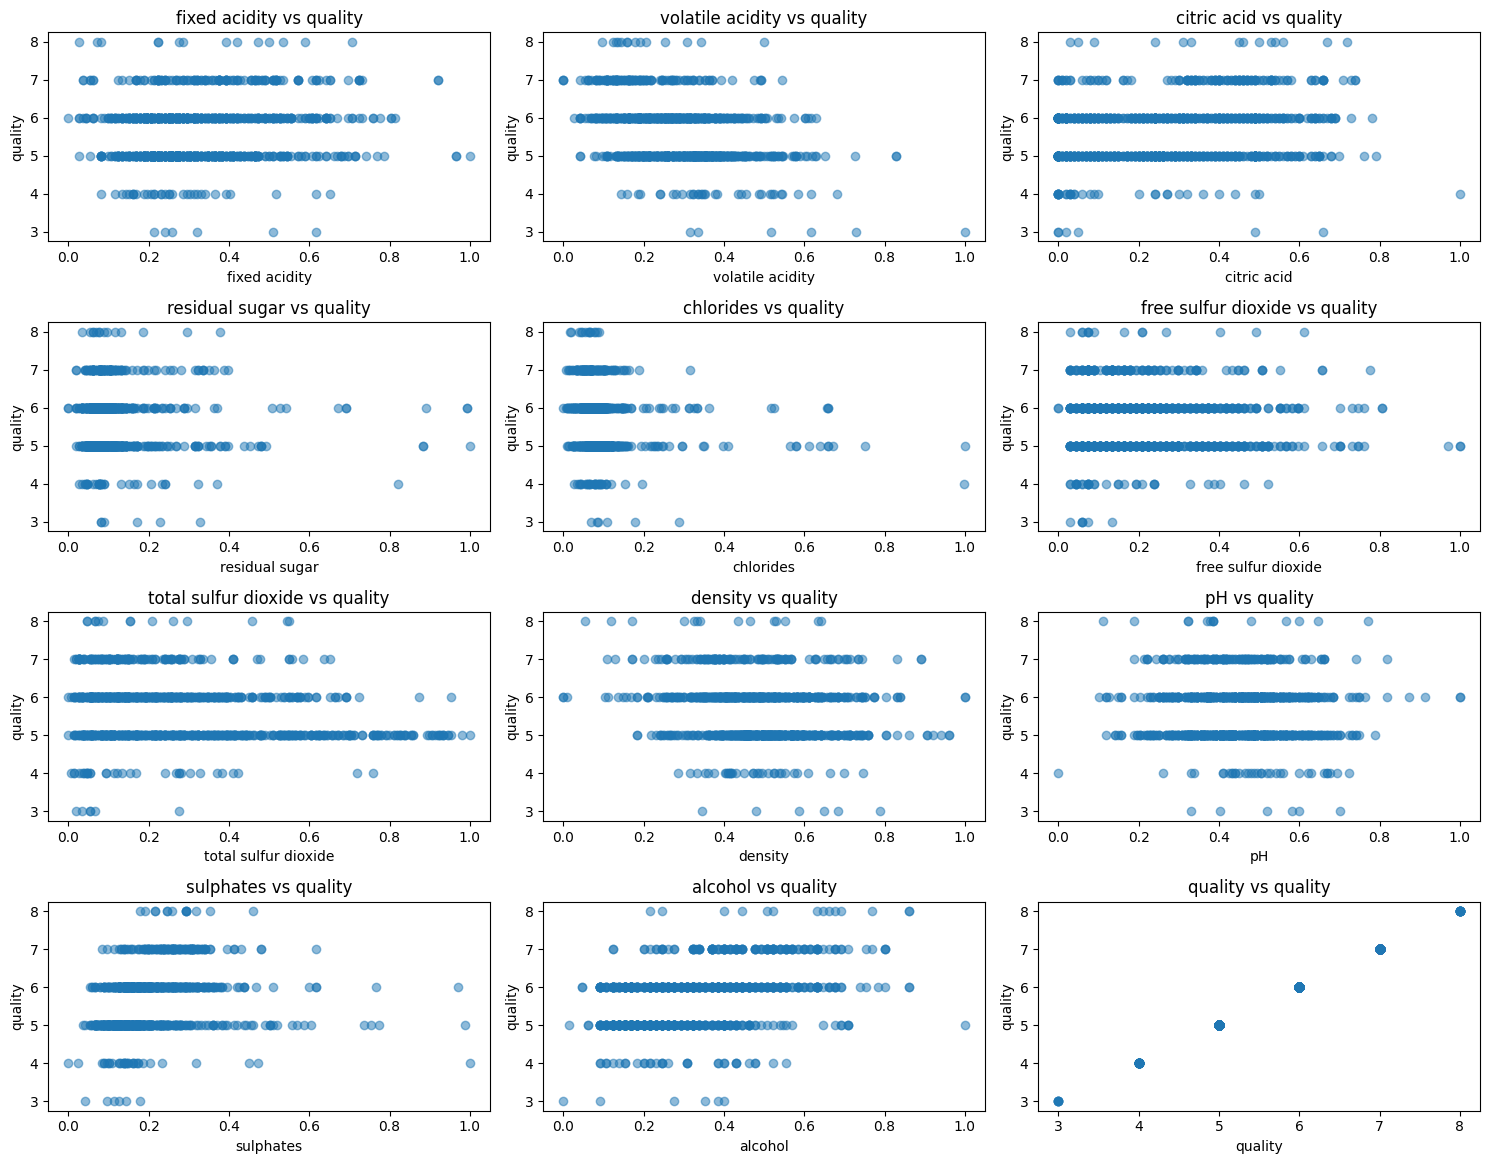

In [9]:
import matplotlib.pyplot as plt

target_column = 'quality' # define the target column
features = train_data.columns # Create scatter plots for each feature against the target column

plt.figure(figsize=(15, 20)) # set up the figure

# loop through each feature and create a scatter plot
for i, feature in enumerate(features):
    plt.subplot(len(features) // 2 + 1, 3, i + 1)  # make a grid for the plots to arrange them
    plt.scatter(train_data[feature], train_data[target_column], alpha=0.5)
    plt.title(f'{feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)

plt.tight_layout()
plt.show()


From the scatter plots, the following observations can be made regarding the relationship between the input features and the target column (`quality`):
**Alcohol**: Shows a clear positive trend, suggesting that higher alcohol content is associated with better quality. **Volatile Acidity**: Displays a slight inverse trend, indicating that lower levels of volatile acidity correlate with higher quality **Sulphates**: Exhibits a potential positive relationship, where higher sulphate levels may correspond to improved quality. **Chlorides**: Shows less obvious correlation, but there might still be a weak trend. **Other features**: Columns such as `density`, `citric acid`, and `free sulfur dioxide` demonstrate weaker or noisier relationships, suggesting they may have less predictive power for determining quality.


Based on the scatter plots, the best features for classification are likely those with a noticeable trend with wine quality. From visual inspection, alcohol, sulphates, and citric acid seem to have a better relationship with quality.

In [10]:
import csv
import math
import random
from collections import Counter
import matplotlib.pyplot as plt

# Select the best features based on correlation analysis
selected_features = ['alcohol', 'sulphates', 'citric acid']
target_column = 'quality'

# Shuffle dataset
data = data.sample(frac=1, random_state=42)

# Normalize selected features using Min-Max Scaling
min_vals = data[selected_features].min()
max_vals = data[selected_features].max()
data[selected_features] = (data[selected_features] - min_vals) / (max_vals - min_vals)

# Split dataset into train (70%) and test (30%)
train_size = int(0.7 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Convert data into lists for manual processing
train_data = train_data[selected_features + [target_column]].values.tolist()
test_data = test_data[selected_features + [target_column]].values.tolist()

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

# Function to get k-nearest neighbors
def get_neighbors(training_data, test_instance, k):
    distances = [(train, euclidean_distance(test_instance[:-1], train[:-1])) for train in training_data]
    distances.sort(key=lambda x: x[1])  # Sort by distance
    return [train[0][-1] for train in distances[:k]]  # Get target values of k-nearest neighbors


In [11]:
# Function to predict class based on majority voting
def predict(training_data, test_instance, k):
    neighbors = get_neighbors(training_data, test_instance, k)
    return Counter(neighbors).most_common(1)[0][0]  # Most common class label

# Run predictions for k=3
k = 3
y_true = [row[-1] for row in test_data]
y_pred = [predict(train_data, row, k) for row in test_data]

In [12]:
# Function to compute F1 Score manually
def compute_f1_score(y_true, y_pred):
    class_labels = list(set(y_true))
    f1_scores = []

    for label in class_labels:
        tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == label and yp == label)
        fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt != label and yp == label)
        fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == label and yp != label)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        f1_scores.append(f1)

    return sum(f1_scores) / len(f1_scores)  # Weighted average F1 score

F1 Score (k=3): 0.3052


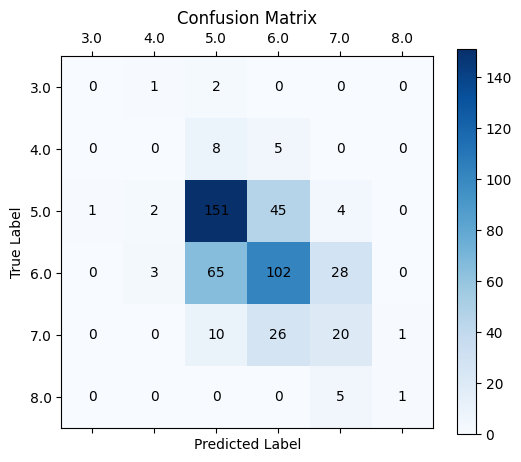

In [13]:
# Compute confusion matrix manually
def compute_confusion_matrix(y_true, y_pred):
    class_labels = sorted(set(y_true))
    matrix = {label: {l: 0 for l in class_labels} for label in class_labels}

    for yt, yp in zip(y_true, y_pred):
        matrix[yt][yp] += 1

    return matrix

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    class_labels = sorted(conf_matrix.keys())
    matrix = np.array([[conf_matrix[i][j] for j in class_labels] for i in class_labels])

    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(matrix, cmap=plt.cm.Blues)
    plt.colorbar(cax)

    ax.set_xticks(np.arange(len(class_labels)))
    ax.set_yticks(np.arange(len(class_labels)))
    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black')

    plt.show()

# Run evaluation

f1 = compute_f1_score(y_true, y_pred)
print(f"F1 Score (k=3): {f1:.4f}")

conf_matrix = compute_confusion_matrix(y_true, y_pred)
plot_confusion_matrix(conf_matrix)


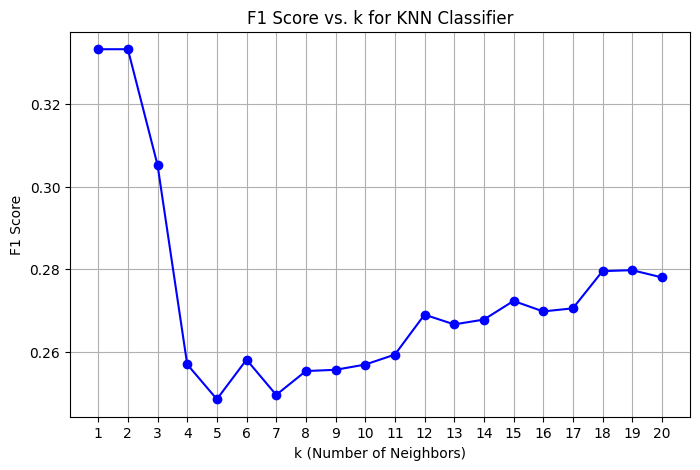

Optimal value for k: 1


In [14]:
# Function to evaluate different k values
def evaluate_knn(train_data, test_data, max_k=20):
    k_values = list(range(1, max_k + 1))
    f1_scores = []

    for k in k_values:
        y_true = [row[-1] for row in test_data]
        y_pred = [predict(train_data, row, k) for row in test_data]
        f1 = compute_f1_score(y_true, y_pred)  # Using manually implemented F1 Score
        f1_scores.append(f1)

    return k_values, f1_scores

# Execute evaluation for different k values
max_k = 20

k_values, f1_scores = evaluate_knn(train_data, test_data, max_k)

# Plot F1 Score vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. k for KNN Classifier')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print optimal k value
optimal_k = k_values[f1_scores.index(max(f1_scores))]
print(f"Optimal value for k: {optimal_k}")